<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/mobile_phone_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
df_train=pd.read_csv('/content/train_dataphone.csv')
df_test=pd.read_csv('/content/test.csv')

In [11]:
df_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [15]:
df_test.head(3)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1


In [10]:
df_train.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [16]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [18]:
df_train.corr()['price_range']

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


In [19]:
x=df_train.drop('price_range',axis=1)
y=df_train['price_range']

<Axes: >

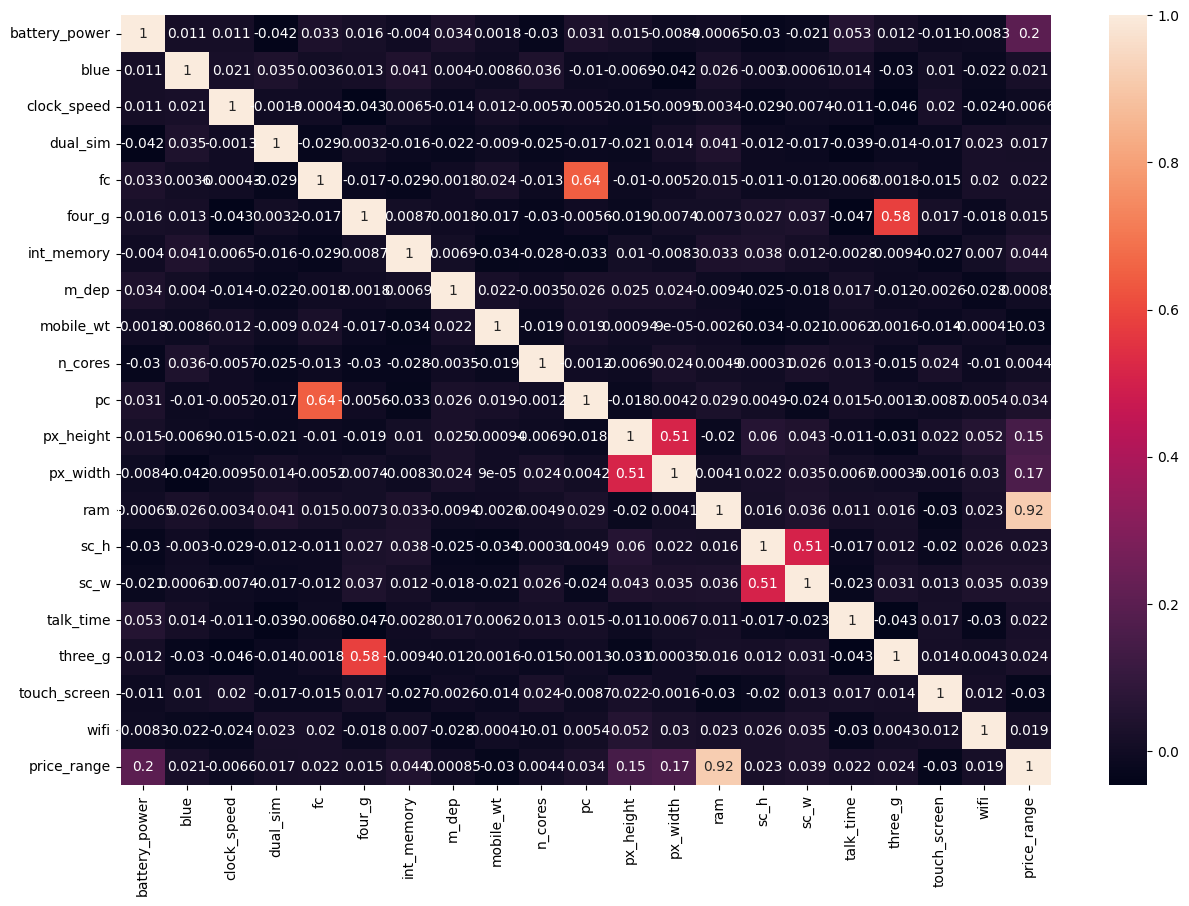

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)

<Axes: xlabel='ram', ylabel='px_width'>

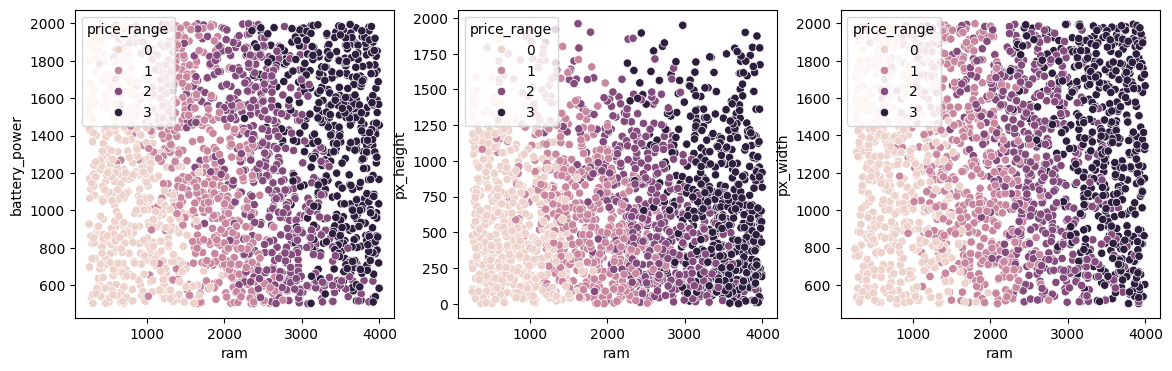

In [25]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(x = "ram" , y ="battery_power",data = df_train,hue= df_train["price_range"])

plt.subplot(1,3,2)
sns.scatterplot(x = "ram" , y ="px_height",data = df_train,hue= df_train["price_range"])

plt.subplot(1,3,3)
sns.scatterplot(x = "ram" , y ="px_width",data = df_train,hue= df_train["price_range"])

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


<Figure size 800x800 with 0 Axes>

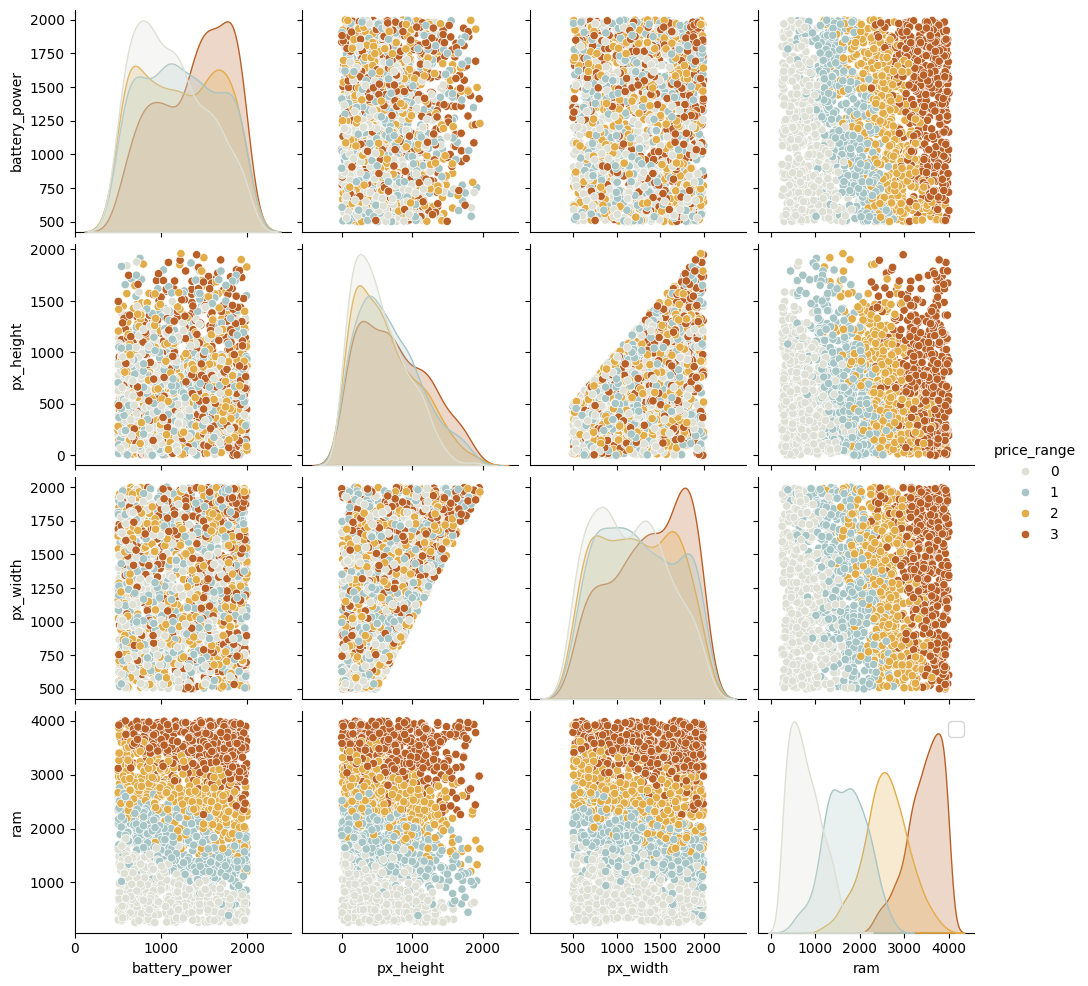

In [30]:
# Pair plot
plt.figure(figsize = (8,8))
# Verify the correct column names in your DataFrame
print(df_train.columns)

# Adjust the columns list accordingly
sns.pairplot(df_train[["battery_power","px_height","px_width","ram", "price_range"]] # Replace with actual existing columns
             ,hue = "price_range",palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48', '#B96028'])

plt.legend(fontsize = 'x-large')
plt.show()

In [31]:
x=df_train[['ram','px_height','px_width','battery_power']]
y=df_train['price_range']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train

,ram,px_height,px_width,battery_power
968,1489,767,1759,1923
240,3560,529,1009,633
819,1406,517,809,1236
692,3508,304,1674,781
420,1587,823,1104,1456
...,...,...,...,...
1130,3022,775,1607,1975
1294,362,759,1858,589
860,2080,729,1267,1829
1459,2916,491,1506,1927


In [35]:
y_train,y_test

(968     1
 240     2
 819     0
 692     3
 420     1
        ..
 1130    3
 1294    0
 860     2
 1459    3
 1126    1
 Name: price_range, Length: 1600, dtype: int64,
 1860    0
 353     2
 1333    1
 905     3
 1289    1
        ..
 965     3
 1284    2
 1739    1
 261     1
 535     2
 Name: price_range, Length: 400, dtype: int64)

In [38]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.87

Text(95.72222222222221, 0.5, 'accuracy')

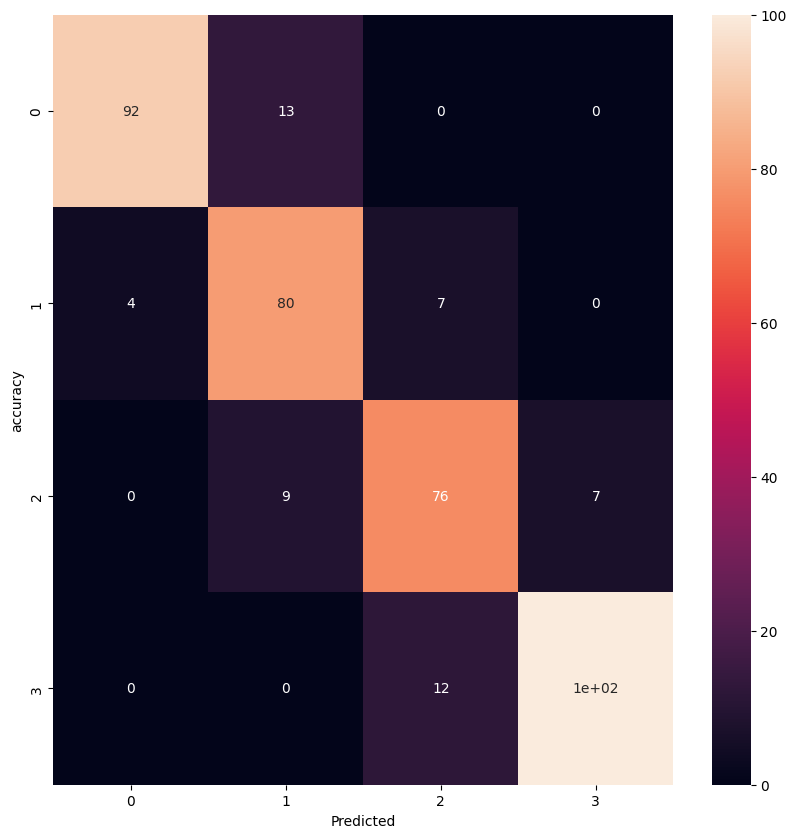

In [42]:
cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy')
cross_val_score
y_pred=dt.predict(x_test)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('accuracy')

Text(95.72222222222221, 0.5, 'accuracy')

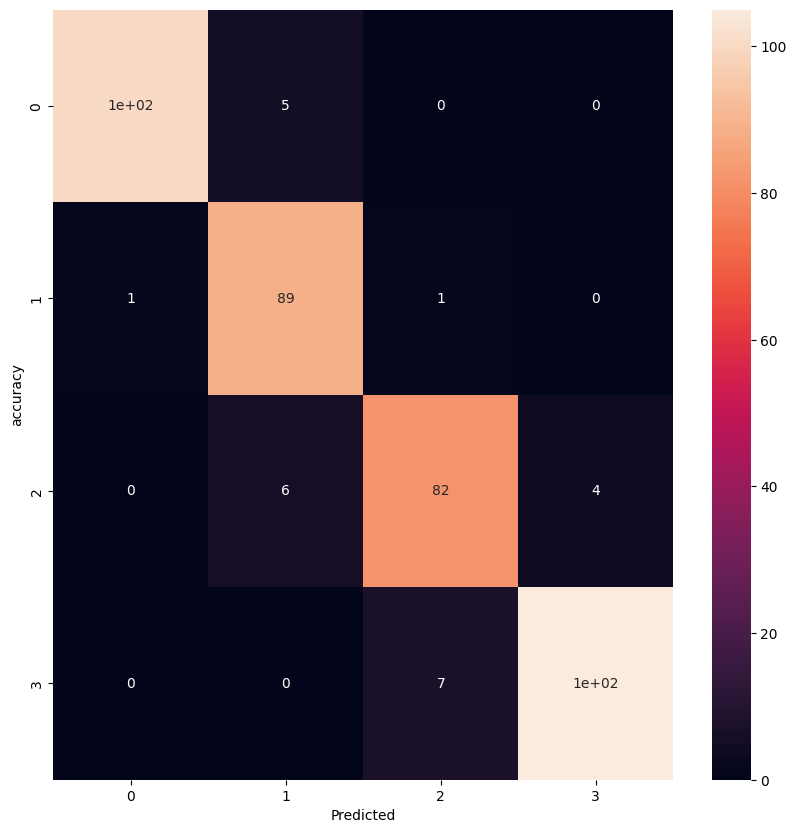

In [44]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)
cross_val_score(rf,x_train,y_train,cv=5,scoring='accuracy')
y_pred=rf.predict(x_test)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(95.72222222222221, 0.5, 'accuracy')

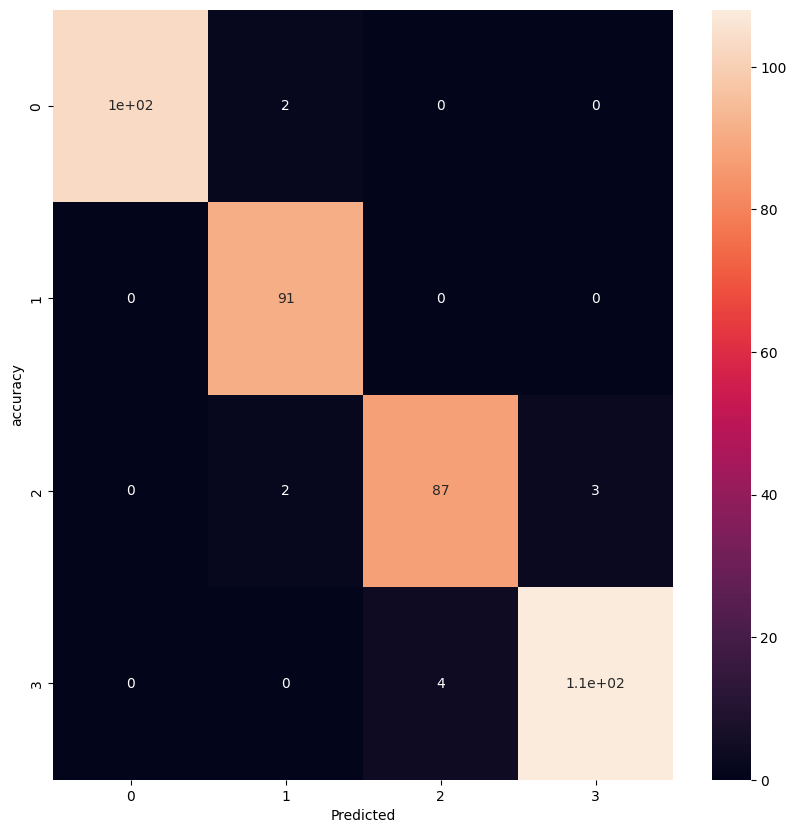

In [45]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
y_pred=lr.predict(x_test)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('accuracy')